# Exercise 3.7.5

In [1]:
from main import test_a, test_b, test_c
from visualization import plot_simulation_results

## a) Simulate the system from initial conditions (in mM) (s1, s2, s3) = (0.3, 0.2, 0.1). Repeat with initial condition (s1, s2, s3) = (6, 4, 4).

In [2]:
t, mm_s0, mm_s1 = test_a()
print(mm_s0[-1] - mm_s1[-1])

[-7.38610895e-10  3.50249847e-09 -1.25562050e-05]


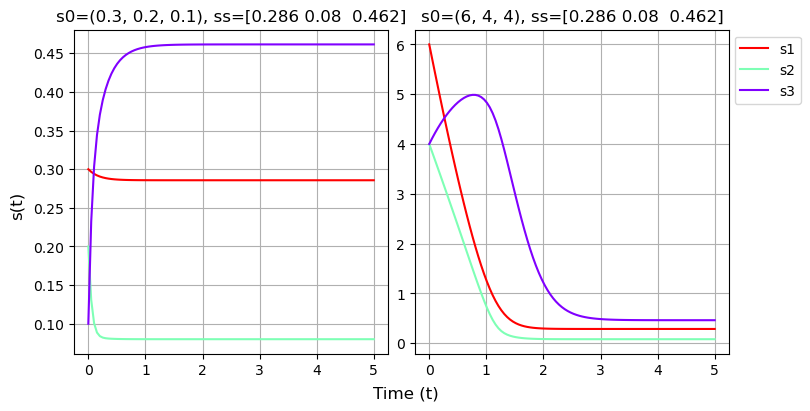

In [3]:
plot_simulation_results(t, mm_s0, mm_s1)

Fig 1. Numerical simulation results of the Michaelis-Menten kinetic reaction chain

The left and right images correspond to different initial conditions s(0)=(0.3,0.2,0.1) and s(0)=(6,4,4), respectively. Both sets of initial conditions ultimately converge to the same steady state. The results show that regardless of the initial conditions, the system converges to the same steady state, $(s_1^{ss}, s_2^{ss}, s_3^{ss}) \approx (0.286,0.208,0.462)$.  The difference in the final steady state is on the order of $10^{−9}$, which can be considered numerically identical. This indicates that under the given parameters, the dynamic system has a unique steady state.

## b) Generate an approximate model in which the rates of reactions 1, 2, and 3 follow first-order mass-action kinetics (i.e. vi = kisi , for i = 1, 2, 3). Choose values for the rate constants ki that give a good approximation to the original nonlinear model. Explain your reasoning. (Hint: Exercise 3.1.2(b) provides one viable approach.)

To approximate the original Michaelis-Menten kinetics with a first-order mass-action model, we want the reaction rate

$v_i = \frac{V_{max, i} s[i]}{K_{m, i} + s[i]}$ to be represented as $v_i \approx k_i s_i$

This leads to $\frac{V_{max, i}}{K_{m, i} + s[i]} \approx k_i$ evaluated at a representative substrate concentration. A natural choice is the steady state ($s^{ss}$) obtained from part (a).

**Step 1: Initial Approximation**

When $K_{m, i} \gg s[i]$, the equation can be simplify as $\frac{V_{max}}{K_m} \approx k$

because $s_i$ becomes negligible relative to $K_{m, i}$.

This gives an initial estimate $k_i^{first}$ 

**Step 2: Including Steady-State Values**

The steady states ($s^{ss}$) get from question a) $\approx (0.28571429, 0.08, 0.46155102)$, we substitute these values to obtain a more accurate estimate:

$k_i \approx \frac{V_{max, i}}{K_{m, i} + s[i]^{ss}}$

All values of $K_m​$ are larger than $s[i]$, but I am not entirely sure whether they are "much larger".

This gives a refined estimate $k_i^{second}$ 

**Step 3: Numerical Optimization**

As an additional approach, I use the initial estimates $k_i^{first}$  as starting points in a numerical optimization routine. The goal is to iteratively adjust the $k_i$ values to minimize the squared error between the steady state predicted by the first-order model and from the original nonlinear model.

This gives a numerical estimate $k_i^{third}$ 


In [4]:
k1, k2, k3 = test_b()

Optimized parameters: [ 6.99999876 24.99994335  4.33333341]
Optimization error: 3.548185647821797e-14


## c) Simulate your simpler (mass-action based) model from the sets of initial conditions in part (a). Comment on the fit. If the approximation is better in one case than the other, explain why.


In [5]:
t, ma_s0, ma_s1 = test_c(k1)
print(ma_s0[-1] - ma_s1[-1])
print(mm_s0[-1] - ma_s0[-1])

[-1.30173650e-14 -8.20038482e-14 -3.95924404e-10]
[0.06349206 0.01333333 0.06153846]


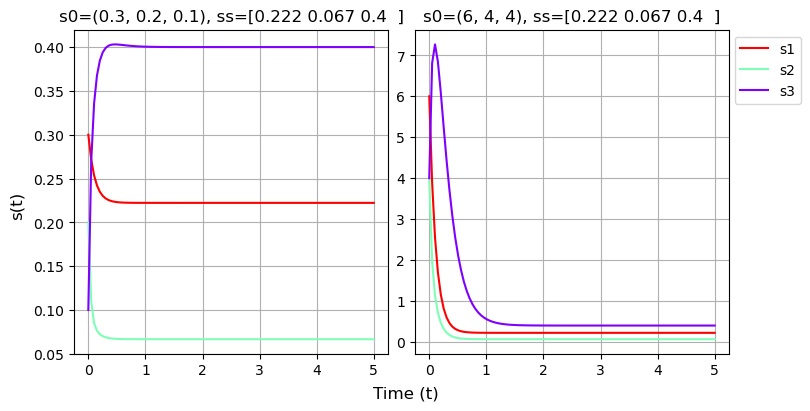

In [6]:
plot_simulation_results(t, ma_s0, ma_s1)

Fig 2. Simulation results of the mass-action model with initial approximation of $k_i$

The left and right panels correspond to the initial conditions $s(0)=(0.3,0.2,0.1)$ and $s(0)=(6,4,4)$, respectively. Under this simplified model, both sets of initial conditions eventually converge to the same approximate steady state (0.222,0.067,0.400). Compared with the steady state of the original nonlinear model (question (a)) $(0.286, 0.08, 0.462)$, there is a difference of approximately $(0.063,0.013,0.062)$, indicating that this initial approximation is able to roughly capture the dynamic behavior of the system, although there is still space for further improvement.

In [7]:
t, ma_s0, ma_s1 = test_c(k2)
print(ma_s0[-1] - ma_s1[-1])
print(mm_s0[-1] - ma_s0[-1])

[-1.95343741e-13  9.75834691e-12 -1.56247138e-08]
[9.98090499e-14 4.46545856e-11 9.33401079e-10]


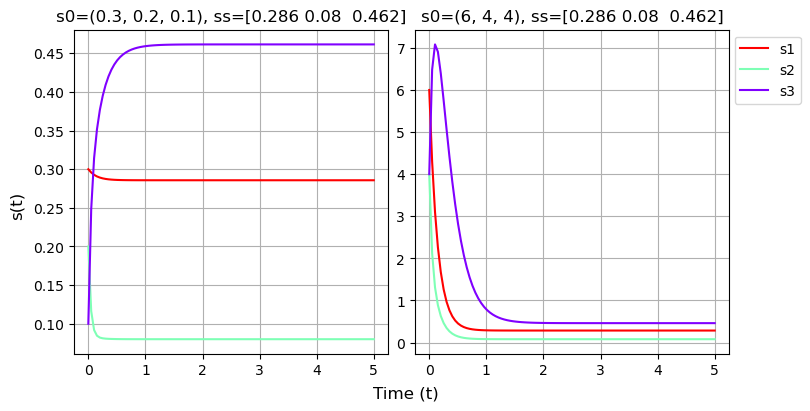

In [8]:
plot_simulation_results(t, ma_s0, ma_s1)

Fig 3. Simulation results of the mass-action model refined $k_i$ including steady-state values

Under this refined model, both sets of initial conditions converge to $(0.286,0.208,0.462)$, which is nearly identical to the steady state of the original nonlinear model, with an error on the order of $10 ^{−8}$. This demonstrates that incorporating the steady-state concentrations into the estimation of the reaction rate constants can effectively enhance the approximation accuracy of the model.

In [9]:
t, ma_s0, ma_s1 = test_c(k3)
print(ma_s0[-1] - ma_s1[-1])
print(mm_s0[-1] - ma_s0[-1])

[-1.95343741e-13  9.26782262e-12 -1.55931579e-08]
[-5.04889132e-08 -1.81240326e-07  9.20164728e-09]


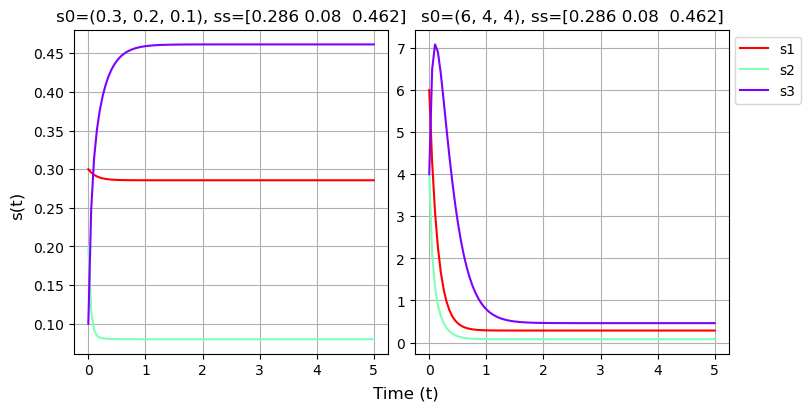

In [10]:
plot_simulation_results(t, ma_s0, ma_s1)

Fig 4. Simulation results of the mass-action model refined $k_i$ via numerical optimization

In the final omodel, both sets of initial conditions converge to (0.286,0.208,0.462), which is almost completely consistent with the steady state of the original nonlinear model, with an error on the order of $10 ^{−7}$. It demonstrates that numerical optimization is another effective approach to improve the estimation of the reaction rate constants and enables the simplified mass-action model to more accurately replicate the dynamic behavior of the original model.